#Risk Prediction model pipeline

The workflow for developing the risk prediction model began with two Excel files provided in the Anonymised_CT_DR_LIM dataset — one containing the control group data and the other containing the intervention group data.

As part of the initial data preprocessing, we performed a thorough data cleaning process to ensure the quality and reliability of the dataset. Specifically, we removed all rows corresponding to patients who had withdrawn from the study, as their data was incomplete and unsuitable for accurate modeling. Any record with a status marked as "Withdrawn" was excluded to maintain the integrity of the dataset for subsequent analysis and model training.

In [61]:
# Install required library
#!pip install pandas openpyxl -q



In [83]:
import pandas as pd
import os
import numpy as np
  
os.getcwd()
os.listdir()

['combined_data.csv',
 'combined_data.xlsx',
 'combined_data_cleaned.xlsx',
 'combined_data_cleanejhhgvd.xlsx',
 'control.xlsx',
 'intervention.xlsx',
 'Risk_Prediction_Model.ipynb',
 '~$combined_data_cleanejhhgvd.xlsx']

In [63]:
# Load the Excel files
control_file = "control.xlsx"
intervention_file = "intervention.xlsx"

# Read the files
df_control = pd.read_excel(control_file)
df_intervention = pd.read_excel(intervention_file)

# Display the first 5 rows of each dataframe
print("Control Group Data (First 5 Rows):")
display(df_control.head())

print("Intervention Group Data (First 5 Rows):")
display(df_intervention.head())

Control Group Data (First 5 Rows):


,,AW,BASELINE (RECRUITMENT),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NO.,Status,Recruitment Date,AGE,GENDER,RACE,DURATION DM,DM TYPE,INSULIN REGIMEN,DDS,...,DDS,FVG,HbA1c,Freq SMBG,Freq Hypo,Freq of Visits,Reduction (%),eGFR,CKD Stage,Target HbA1C
1,1,COMPLETED,2 7 2020,59,FEMALE,M,17,2,PTDS,1.53,...,,12.7,8.8,294,0,6,0.154,69.67,2,0.07
2,2,COMPLETED,10 6 2020,48,MALE,M,16,2,BB,3,...,1.06,9.3,8.5,229,4,6,0.076,50.94,3a,0.07
3,3,WITHDRAWN,9 7 2020,,,,,,,2.18,...,,,,,,,,0,,
4,4,COMPLETED,26/6/2020,37,FEMALE,M,9,2,BB,2.53,...,,7,8,132,1,6,0.375,125,1,0.065


Intervention Group Data (First 5 Rows):


,,.1,BASELINE (RECRUITMENT),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NO.,Status,Date,AGE,GENDER,RACE,DURATION DM,DM TYPE,INSULIN REGIME,DDS,...,FVG,HbA1c,FREQ SMBG,FREW HYPO,FREQ OF VISITS,Reduction (%),Egfr,CKD Stage,Target HbA1C,Reached Target HbA1C
1,1,COMPLETED,2020-12-05 00:00:00,46,MALE,I,20,2,BB,2.9,...,9.3,7.6,482,0,3,0.106,67.46,2,0.07,No
2,2,COMPLETED,2020-12-05 00:00:00,36,MALE,C,5,2,BB,2.17,...,6.8,7.1,617,11,3,0.324,135.3,1,0.065,NaN
3,3,COMPLETED,2020-04-06 00:00:00,41,MALE,M,13,2,PTDS,2.88,...,12.4,10.3,371,6,3,0.028,101.2,1,0.07,NaN
4,4,COMPLETED,2020-09-07 00:00:00,51,FEMALE,I,15,2,BB,4.71,...,4,6.1,553,14,3,0.247,64.96,2,0.065,Yes


In [64]:
#Print out all column header title
# Load the xlsx files, skipping the first row
df_control = pd.read_excel("control.xlsx",  skiprows=1)
df_intervention = pd.read_excel("intervention.xlsx", skiprows=1)

# List out the column headers
print("Control Group Column Headers:")
print(df_control.columns.tolist())

print("\nIntervention Group Column Headers:")
print(df_intervention.columns.tolist())


Control Group Column Headers:
['NO.', 'Status', 'Recruitment Date', 'AGE', 'GENDER', 'RACE', 'DURATION DM', 'DM TYPE', 'INSULIN REGIMEN', 'DDS', 'FVG (mmol/L)', 'HbA1c (%)', 'Date', 'FVG', 'HbA1c', 'Date.1', 'DDS.1', 'FVG.1', 'HbA1c.1', 'Freq SMBG', 'Freq Hypo', 'Freq of Visits', 'Reduction (%)', 'eGFR', 'CKD Stage', 'Target HbA1C ']

Intervention Group Column Headers:
['NO.', 'Status', 'Date', 'AGE', 'GENDER', 'RACE', 'DURATION DM', 'DM TYPE', 'INSULIN REGIME', 'DDS', 'FVG (mmol/L)', 'HbA1c (%)', 'Date.1', 'FVG', 'HbA1c', 'Date.2', 'DDS.1', 'FVG.1', 'HbA1c.1', 'FREQ SMBG', 'FREW HYPO', 'FREQ OF VISITS', 'Reduction (%)', 'Egfr', 'CKD Stage', 'Target HbA1C ', 'Reached Target HbA1C']


In [65]:
#A better look
# Column headers we have
control_headers = ['NO.', 'Status', 'Recruitment Date', 'AGE', 'GENDER', 'RACE',
                   'DURATION DM', 'DM TYPE', 'INSULIN REGIMEN', 'DDS', 'FVG (mmol/L)',
                   'HbA1c (%)', 'Date', 'FVG', 'HbA1c', 'Date.1', 'DDS.1', 'FVG.1', 'HbA1c.1',
                   'Freq SMBG', 'Freq Hypo', 'Freq of Visits', 'Reduction (%)', 'eGFR',
                   'CKD Stage', 'Target HbA1C ']

intervention_headers = ['NO.', 'Status', 'Date', 'AGE', 'GENDER', 'RACE',
                        'DURATION DM', 'DM TYPE', 'INSULIN REGIME', 'DDS',
                        'FVG (mmol/L)', 'HbA1c (%)', 'Date.1', 'FVG', 'HbA1c', 'Date.2',
                        'DDS.1', 'FVG.1', 'HbA1c.1', 'FREQ SMBG', 'FREW HYPO', 'FREQ OF VISITS',
                        'Reduction (%)', 'Egfr', 'CKD Stage', 'Target HbA1C ', 'Reached Target HbA1C']

# Combine into a DataFrame
# Create a DataFrame with two columns: Control and Intervention
headers_df = pd.DataFrame({
    "Control Group": pd.Series(control_headers),
    "Intervention Group": pd.Series(intervention_headers)
})


print("Comparison of Column Headers")
display(headers_df)


Comparison of Column Headers


,Control Group,Intervention Group
0,NO.,NO.
1,Status,Status
2,Recruitment Date,Date
3,AGE,AGE
4,GENDER,GENDER
5,RACE,RACE
6,DURATION DM,DURATION DM
7,DM TYPE,DM TYPE
8,INSULIN REGIMEN,INSULIN REGIME
9,DDS,DDS


In [66]:
#Renaming some columns for consistency


df_intervention.rename(columns={
    'Date' : 'Recruitment Date',
    'INSULIN REGIME' : 'INSULIN REGIMEN',
    'Date.1' : 'Date-1',
    'Date.2' : 'Date-2',
    'FVG (mmol/L)' : 'FVG1',
    'HbA1c (%)' : 'HbA1c1',
    'Egfr': 'eGFR',
    'DDS' : 'DDS1',
    'FVG' : 'FVG2',
    'HbA1c' : 'HbA1c2',
    'DDS.1' : 'DDS3',
    'FVG.1' : 'FVG3',
    'HbA1c.1' : 'HbA1c3',
    'FREQ SMBG' : 'Freq SMBG',
    'FREW HYPO' : 'Freq Hypo',
    'FREQ OF VISITS' : 'Freq of Visits'
    }, inplace=True)

df_control.rename(columns={
    'Date' : 'Date-1',
    'Date.1' : 'Date-2',
    'FVG (mmol/L)' : 'FVG1',
    'HbA1c (%)' : 'HbA1c1',
    'DDS' : 'DDS1',
    'FVG' : 'FVG2',
    'HbA1c' : 'HbA1c2',
    'DDS.1' : 'DDS3',
    'FVG.1' : 'FVG3',
    'HbA1c.1' : 'HbA1c3'
    }, inplace=True)

# Verify the change
print("Updated Intervention Group Columns:")
print('intervention: ' , df_intervention.columns.tolist())
print('control: ' , df_control.columns.tolist())


Updated Intervention Group Columns:
intervention:  ['NO.', 'Status', 'Recruitment Date', 'AGE', 'GENDER', 'RACE', 'DURATION DM', 'DM TYPE', 'INSULIN REGIMEN', 'DDS1', 'FVG1', 'HbA1c1', 'Date-1', 'FVG2', 'HbA1c2', 'Date-2', 'DDS3', 'FVG3', 'HbA1c3', 'Freq SMBG', 'Freq Hypo', 'Freq of Visits', 'Reduction (%)', 'eGFR', 'CKD Stage', 'Target HbA1C ', 'Reached Target HbA1C']
control:  ['NO.', 'Status', 'Recruitment Date', 'AGE', 'GENDER', 'RACE', 'DURATION DM', 'DM TYPE', 'INSULIN REGIMEN', 'DDS1', 'FVG1', 'HbA1c1', 'Date-1', 'FVG2', 'HbA1c2', 'Date-2', 'DDS3', 'FVG3', 'HbA1c3', 'Freq SMBG', 'Freq Hypo', 'Freq of Visits', 'Reduction (%)', 'eGFR', 'CKD Stage', 'Target HbA1C ']


In [67]:
#A better look
# Column headers we have
control_headers = ['NO.', 'Status', 'Recruitment Date', 'AGE', 'GENDER',
                   'RACE', 'DURATION DM', 'DM TYPE', 'INSULIN REGIMEN',
                   'DDS1', 'FVG1', 'HbA1c1', 'Date-1', 'FVG2', 'HbA1c2', 'Date-2',
                   'DDS3', 'FVG3', 'HbA1c3', 'Freq SMBG', 'Freq Hypo', 'Freq of Visits',
                   'Reduction (%)', 'eGFR', 'CKD Stage', 'Target HbA1C ']

intervention_headers = ['NO.', 'Status', 'Recruitment Date', 'AGE', 'GENDER',
                        'RACE', 'DURATION DM', 'DM TYPE', 'INSULIN REGIMEN', 'DDS1',
                        'FVG1', 'HbA1c1', 'Date-1', 'FVG2', 'HbA1c2', 'Date-2', 'DDS3',
                        'FVG3', 'HbA1c3', 'Freq SMBG', 'Freq Hypo', 'Freq of Visits',
                        'Reduction (%)', 'eGFR', 'CKD Stage', 'Target HbA1C ', 'Reached Target HbA1C']

# Combine into a DataFrame
# Create a DataFrame with two columns: Control and Intervention
headers_df = pd.DataFrame({
    "Control Group": pd.Series(control_headers),
    "Intervention Group": pd.Series(intervention_headers)
})


print("Comparison of Column Headers")
display(headers_df)


Comparison of Column Headers


,Control Group,Intervention Group
0,NO.,NO.
1,Status,Status
2,Recruitment Date,Recruitment Date
3,AGE,AGE
4,GENDER,GENDER
5,RACE,RACE
6,DURATION DM,DURATION DM
7,DM TYPE,DM TYPE
8,INSULIN REGIMEN,INSULIN REGIMEN
9,DDS1,DDS1


In [68]:
# Add a column to identify the source of each row
df_control["Group"] = "Control"
df_intervention["Group"] = "Intervention"

# Combine the two DataFrames vertically
combined_df = pd.concat([df_control, df_intervention], ignore_index=True)

# Save the combined DataFrame to a new Excel file
combined_df.to_excel("combined_data.xlsx", index=False)

# Save as CSV (backup)
combined_df.to_csv("combined_data.csv", index=False)

print("Combined file saved successfully!")


Combined file saved successfully!


In [69]:
#Dropping unwanted colums which are irrelevent to our prediction model
main_df = pd.read_excel(
    "combined_data.xlsx",
    na_values=[" ", "", "NA", "N/A", "--", "A", "\xa0", "Â"]
)

# List the column names to drop
cols_to_drop = ["NO.", "Recruitment Date", "AGE", "RACE", "DURATION DM", "DDS3","FVG3","DM TYPE","INSULIN REGIMEN","Date-1", "Date-2","Group", "Target HbA1C ","Reached Target HbA1C", "Reduction (%)"]

# Dropping them
main_df = main_df.drop(columns=cols_to_drop)

# checking result
main_df.head()

,Status,GENDER,DDS1,FVG1,HbA1c1,FVG2,HbA1c2,HbA1c3,Freq SMBG,Freq Hypo,Freq of Visits,eGFR,CKD Stage
0,COMPLETED,FEMALE,1.53,15.5,10.4,13.6,9.3,8.8,294.0,0.0,6.0,69.67,2
1,COMPLETED,MALE,3,-,9.2,9.5,8.9,8.5,229.0,4.0,6.0,50.94,3a
2,WITHDRAWN,NaN,2.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
3,COMPLETED,FEMALE,2.53,16.4,12.8,11.4,11.6,8.0,132.0,1.0,6.0,125.00,1
4,COMPLETED,FEMALE,2.59,7.9,9.1,10.1,8.3,9.4,125.0,2.0,5.0,152.40,1


In [70]:
# Now a look into the missing values per attributes
missing_summary = main_df.isnull().sum()
print(missing_summary[missing_summary > 0])


Status             2
GENDER            23
DDS1               8
FVG1               9
HbA1c1             7
FVG2              22
HbA1c2            20
HbA1c3            24
Freq SMBG         23
Freq Hypo         23
Freq of Visits    22
eGFR              12
CKD Stage         24
dtype: int64


In [71]:
# Remove rows where the 'Status' column is 'Withdrawn'
main_df = main_df[main_df['Status'].str.lower() != 'withdrawn']

# Reset the index after deletion (optional but cleaner)
main_df.reset_index(drop=True, inplace=True)

# Verify the result
print("After removing 'Withdrawn' rows:")
display(main_df.head(10))


After removing 'Withdrawn' rows:


,Status,GENDER,DDS1,FVG1,HbA1c1,FVG2,HbA1c2,HbA1c3,Freq SMBG,Freq Hypo,Freq of Visits,eGFR,CKD Stage
0,COMPLETED,FEMALE,1.53,15.5,10.4,13.6,9.3,8.8,294.0,0.0,6.0,69.67,2
1,COMPLETED,MALE,3,-,9.2,9.5,8.9,8.5,229.0,4.0,6.0,50.94,3a
2,COMPLETED,FEMALE,2.53,16.4,12.8,11.4,11.6,8.0,132.0,1.0,6.0,125.00,1
3,COMPLETED,FEMALE,2.59,7.9,9.1,10.1,8.3,9.4,125.0,2.0,5.0,152.40,1
4,COMPLETED,MALE,`1.8,7.8,8.4,8.2,8.5,8.5,130.0,0.0,6.0,39.86,3b
5,COMPLETED,MALE,3.35,5.1,9.3,3,7.6,6.7,207.0,4.0,6.0,117.10,1
6,COMPLETED,MALE,2.76,21.5,12.1,6.6,9.3,11.6,129.0,0.0,5.0,123.70,1
7,COMPLETED,MALE,2.59,9.1,8.3,7.8,9.3,9.1,81.0,0.0,5.0,38.49,3b
8,COMPLETED,FEMALE,1.41,15.3,9.4,12.6,7.3,7.0,211.0,0.0,5.0,147.90,1
9,COMPLETED,FEMALE,1.65,15,8.7,9,7.8,7.8,377.0,0.0,5.0,94.78,1


In [72]:
#  Basic dataset summary
print("===== Dataset Summary =====")
print(main_df.info())  # Shows column types, non-null counts, memory usage

#  Summary statistics for numeric columns
print("\n===== Summary Statistics (Numeric Columns) =====")
display(main_df.describe())

#  Count missing values for each column
print("\n===== Missing Values Per Column =====")
missing_summary = main_df.isnull().sum().reset_index()
missing_summary.columns = ['Column Name', 'Missing Values']

# Add percentage of missing data
missing_summary['Missing Percentage'] = (
    (missing_summary['Missing Values'] / len(main_df)) * 100
).round(2)

display(missing_summary)



===== Dataset Summary =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Status          106 non-null    object 
 1   GENDER          103 non-null    object 
 2   DDS1            104 non-null    object 
 3   FVG1            104 non-null    object 
 4   HbA1c1          105 non-null    float64
 5   FVG2            102 non-null    object 
 6   HbA1c2          103 non-null    object 
 7   HbA1c3          102 non-null    float64
 8   Freq SMBG       103 non-null    float64
 9   Freq Hypo       103 non-null    float64
 10  Freq of Visits  103 non-null    float64
 11  eGFR            106 non-null    float64
 12  CKD Stage       102 non-null    object 
dtypes: float64(6), object(7)
memory usage: 11.1+ KB
None

===== Summary Statistics (Numeric Columns) =====


,HbA1c1,HbA1c3,Freq SMBG,Freq Hypo,Freq of Visits,eGFR
count,105.000000,102.000000,103.000000,103.000000,103.000000,106.000000
mean,9.752381,7.967647,278.776699,3.699029,3.904981,90.139340
std,1.491521,1.091204,151.707467,7.951859,1.160677,34.063871
min,8.000000,5.700000,38.000000,0.000000,0.213000,0.000000
25%,8.600000,7.300000,175.000000,0.000000,3.000000,71.560000
50%,9.400000,7.850000,228.000000,0.000000,3.000000,90.960000
75%,10.600000,8.600000,345.500000,3.500000,5.000000,110.000000
max,14.100000,11.600000,749.000000,45.000000,7.000000,173.900000



===== Missing Values Per Column =====


,Column Name,Missing Values,Missing Percentage
0,Status,2,1.85
1,GENDER,5,4.63
2,DDS1,4,3.70
3,FVG1,4,3.70
4,HbA1c1,3,2.78
5,FVG2,6,5.56
6,HbA1c2,5,4.63
7,HbA1c3,6,5.56
8,Freq SMBG,5,4.63
9,Freq Hypo,5,4.63


In [73]:
# Drop rows where more than 50% of the columns are missing
threshold = len(main_df.columns) * 0.5
main_df = main_df.dropna(thresh=threshold)

# Reset the index after dropping
main_df = main_df.reset_index(drop=True)

# (Optional) Check how many rows remain
print(f"Remaining rows: {len(main_df)}")


Remaining rows: 103


In [74]:
main_df.to_excel("combined_data_cleaned.xlsx", index=False)

We inspect the file and removed any rows that had 50% plus missing values. Some variables were wrongly ingectes for example 9,4 instead of expected 9.4 and at the very bottom one row had only the status but no data which was dropped (manually as only one instances found).

In [75]:
#Read the final cleaned version of the data
final_df = pd.read_excel("combined_data_cleaned.xlsx")

In [76]:
#  Basic dataset summary
print("===== Dataset Summary =====")
print(final_df.info())  # Shows column types, non-null counts, memory usage

#  Summary statistics for numeric columns
print("\n===== Summary Statistics (Numeric Columns) =====")
display(final_df.describe())

#  Count missing values for each column
print("\n===== Missing Values Per Column =====")
missing_summary = final_df.isnull().sum().reset_index()
missing_summary.columns = ['Column Name', 'Missing Values']

# Add percentage of missing data
missing_summary['Missing Percentage'] = (
    (missing_summary['Missing Values'] / len(final_df)) * 100
).round(2)

display(missing_summary)

===== Dataset Summary =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Status          103 non-null    object 
 1   GENDER          103 non-null    object 
 2   DDS1            101 non-null    object 
 3   FVG1            102 non-null    object 
 4   HbA1c1          103 non-null    float64
 5   FVG2            102 non-null    object 
 6   HbA1c2          103 non-null    object 
 7   HbA1c3          102 non-null    float64
 8   Freq SMBG       103 non-null    int64  
 9   Freq Hypo       103 non-null    int64  
 10  Freq of Visits  102 non-null    float64
 11  eGFR            102 non-null    float64
 12  CKD Stage       102 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 10.6+ KB
None

===== Summary Statistics (Numeric Columns) =====


,HbA1c1,HbA1c3,Freq SMBG,Freq Hypo,Freq of Visits,eGFR
count,103.000000,102.000000,103.000000,103.000000,102.000000,102.000000
mean,9.734951,7.967647,278.776699,3.699029,3.941176,93.674216
std,1.497953,1.091204,151.707467,7.951859,1.106449,29.527892
min,8.000000,5.700000,38.000000,0.000000,3.000000,38.490000
25%,8.600000,7.300000,175.000000,0.000000,3.000000,74.050000
50%,9.300000,7.850000,228.000000,0.000000,3.000000,92.560000
75%,10.550000,8.600000,345.500000,3.500000,5.000000,110.200000
max,14.100000,11.600000,749.000000,45.000000,7.000000,173.900000



===== Missing Values Per Column =====


,Column Name,Missing Values,Missing Percentage
0,Status,0,0.00
1,GENDER,0,0.00
2,DDS1,2,1.94
3,FVG1,1,0.97
4,HbA1c1,0,0.00
5,FVG2,1,0.97
6,HbA1c2,0,0.00
7,HbA1c3,1,0.97
8,Freq SMBG,0,0.00
9,Freq Hypo,0,0.00


In [77]:
numeric_like = ["DDS1","HbA1c2", "HbA1c3", "FVG1", "FVG2"]

for col in numeric_like:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')



In [78]:
final_df.dtypes

Status             object
GENDER             object
DDS1              float64
FVG1              float64
HbA1c1            float64
FVG2              float64
HbA1c2            float64
HbA1c3            float64
Freq SMBG           int64
Freq Hypo           int64
Freq of Visits    float64
eGFR              float64
CKD Stage          object
dtype: object

Since we have such a few data points we cannot afford to lose any. Therefore we ingest the median not the mean as it may be affected by outliers.

In [79]:
# Median values for floating point variables
float_columns = final_df.select_dtypes(include=["float64"])
median_summary = (
    float_columns.median()
    .reset_index()
    .rename(columns={"index": "Column", 0: "Median"})
)

print("Median values for floating point features:")
display(median_summary)


Median values for floating point features:


,Column,Median
0,DDS1,2.59
1,FVG1,9.70
2,HbA1c1,9.30
3,FVG2,7.60
4,HbA1c2,8.10
5,HbA1c3,7.85
6,Freq of Visits,3.00
7,eGFR,92.56


In [80]:
# Fill missing numeric values with their respective medians
numeric_medians = final_df.select_dtypes(include=["float64", "float32"]).median()
final_df[numeric_medians.index] = final_df[numeric_medians.index].fillna(numeric_medians)

print("Remaining missing values in numeric columns:")
display(final_df[numeric_medians.index].isnull().sum())


Remaining missing values in numeric columns:


DDS1              0
FVG1              0
HbA1c1            0
FVG2              0
HbA1c2            0
HbA1c3            0
Freq of Visits    0
eGFR              0
dtype: int64

In [81]:
print(final_df["GENDER"].unique())
print(final_df["CKD Stage"].unique())


['FEMALE' 'MALE']
[2 '3a' 1 '3b' nan]


In [85]:
# --- CKD STAGE MAPPING ---
# Define ordinal mapping
stage_map = {
    "1": 1,
    "2": 2,
    "3a": 3,
    "3b": 4,
    "4": 5,
    "5": 6
}

# Create new numeric column for CKD Stage
final_df["CKD_Stage_Num"] = final_df["CKD Stage"].map(stage_map)

# Impute missing CKD_Stage_Num with median (since it's ordinal)
median_ckd = final_df["CKD_Stage_Num"].median()
final_df["CKD_Stage_Num"] = final_df["CKD_Stage_Num"].fillna(median_ckd).astype(int)

print(f"Median CKD stage used for imputation: {median_ckd}")
print(final_df["CKD_Stage_Num"].value_counts(dropna=False))

# --- GENDER MAPPING ---
# Standardize gender labels
final_df["GENDER"] = final_df["GENDER"].str.strip().str.title()  # handles 'male', ' Male ', etc.

# Create new numeric column for Gender (1=Male, 0=Female)
gender_map = {"Male": 1, "Female": 0}
final_df["Gender_Num"] = final_df["GENDER"].map(gender_map)

# (Optional) Handle missing or unexpected gender entries
final_df["Gender_Num"] = final_df["Gender_Num"].fillna(-1).astype(int)  # -1 = Unknown/Other

print(final_df[["GENDER", "Gender_Num"]].head())
print(final_df[["CKD Stage", "CKD_Stage_Num"]].head())

# --- Verify new datatypes ---
print(final_df[["GENDER", "Gender_Num", "CKD Stage", "CKD_Stage_Num"]].dtypes)


Median CKD stage used for imputation: 4.0
CKD_Stage_Num
4    98
3     5
Name: count, dtype: int64
   GENDER  Gender_Num
0  Female           0
1    Male           1
2  Female           0
3  Female           0
4    Male           1
  CKD Stage  CKD_Stage_Num
0         2              4
1        3a              3
2         1              4
3         1              4
4        3b              4
GENDER           object
Gender_Num        int64
CKD Stage        object
CKD_Stage_Num     int64
dtype: object


##  Data Cleaning Summary

### Steps Performed

1. **Combined datasets**  
   - Merged both source datasets into a single unified dataframe for analysis.

2. **Dropped unrelated columns**  
   - Removed attributes not relevant to the target variable (**HbA1c3**) to simplify the model and reduce noise.

3. **Handled incomplete rows**  
   - Manually removed rows with **more than 80% missing values**.  
   - Excluded one row containing only the `Status` field with no other valid entries.

4. **Assessed missing data**  
   - Calculated the **number and percentage of missing cells** for each column to evaluate data completeness.

5. **Corrected data types**  
   - Converted columns with **numeric values stored as objects** (e.g., `HbA1c1`, `HbA1c2`, `FVG1`, `FVG2`, etc.) into proper `float` types.

6. **Imputed missing values**  
   - Replaced missing entries in each column using the **median value** of the respective attribute to ensure robustness against outliers.

---

###  Outcome
The dataset is now **fully cleaned and ready for modeling**, with consistent data types, no extreme missingness, and a solid foundation for feature engineering and predictive analysis.


In [88]:
#Feature engineering
# --- Feature 1: HbA1c_Delta_1_2 ---
final_df["HbA1c_Delta_1_2"] = final_df["HbA1c2"] - final_df["HbA1c1"]

# --- Feature 2: FVG_Delta_1_2 ---
final_df["FVG_Delta_1_2"] = final_df["FVG2"] - final_df["FVG1"]

# --- Feature 3: Avg_FVG_1_2 ---
final_df["Avg_FVG_1_2"] = (final_df["FVG1"] + final_df["FVG2"]) / 2

# --- Feature 4: Reduction (percentage change of HbA1c1 to HbA1c2) ---
# Formula: ((HbA1c2 - HbA1c1) / HbA1c1) * 100
# Protect against division by zero using np.where
final_df["Reduction"] = np.where(final_df["HbA1c1"] != 0,
                           ((final_df["HbA1c2"] - final_df["HbA1c1"]) / final_df["HbA1c1"]) * 100,
                           np.nan)


# --- Preview the new features ---
print(final_df[["HbA1c1", "HbA1c2", "HbA1c_Delta_1_2", "Reduction", 
          "FVG1", "FVG2", "FVG_Delta_1_2", "Avg_FVG_1_2"]].head())


   HbA1c1  HbA1c2  HbA1c_Delta_1_2  Reduction  FVG1  FVG2  FVG_Delta_1_2  \
0    10.4     9.3             -1.1 -10.576923  15.5  13.6           -1.9   
1     9.2     8.9             -0.3  -3.260870   9.7   9.5           -0.2   
2    12.8    11.6             -1.2  -9.375000  16.4  11.4           -5.0   
3     9.1     8.3             -0.8  -8.791209   7.9  10.1            2.2   
4     8.4     8.5              0.1   1.190476   7.8   8.2            0.4   

   Avg_FVG_1_2  
0        14.55  
1         9.60  
2        13.90  
3         9.00  
4         8.00  


In [90]:
!pip install seaborn -q

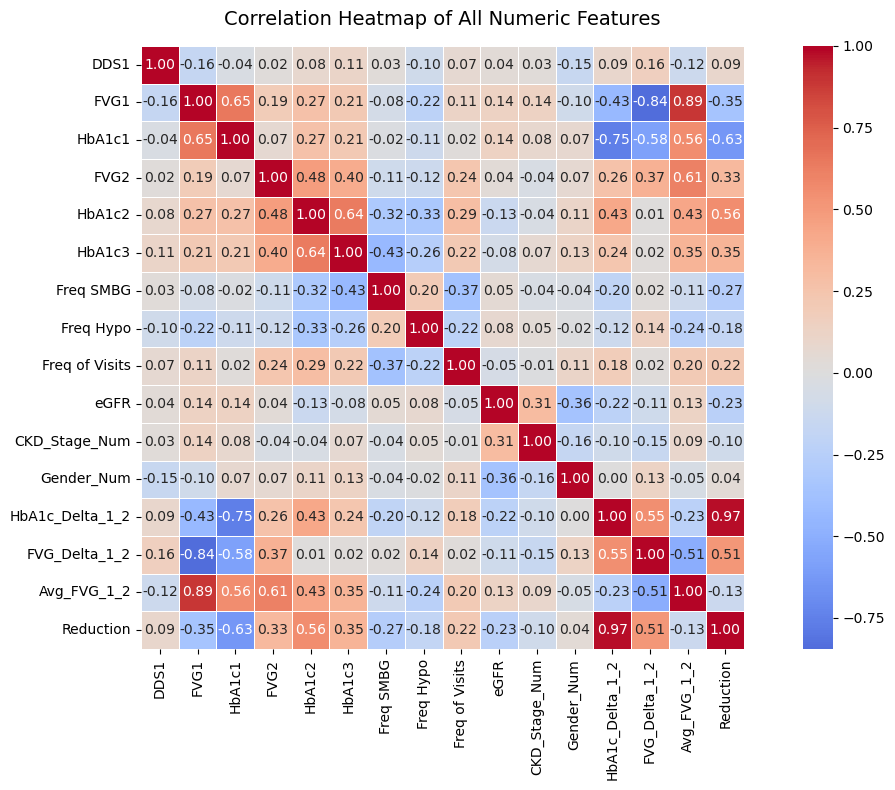

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = final_df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,           # show correlation values
    fmt=".2f",            # two decimal places
    cmap="coolwarm",      # red-blue color palette
    center=0,             # 0 is white
    square=True,          # make each cell square
    linewidths=0.5        # subtle grid lines
)

# Add title and show
plt.title("Correlation Heatmap of All Numeric Features", fontsize=14, pad=15)
plt.tight_layout()
plt.show()


Top positive correlations with HbA1c3:
HbA1c2             0.637921
FVG2               0.399853
Reduction          0.354519
Avg_FVG_1_2        0.352244
HbA1c_Delta_1_2    0.240980
Name: HbA1c3, dtype: float64 

Top negative correlations with HbA1c3:
Freq SMBG       -0.428214
Freq Hypo       -0.259534
eGFR            -0.078299
FVG_Delta_1_2    0.020954
CKD_Stage_Num    0.068248
Name: HbA1c3, dtype: float64


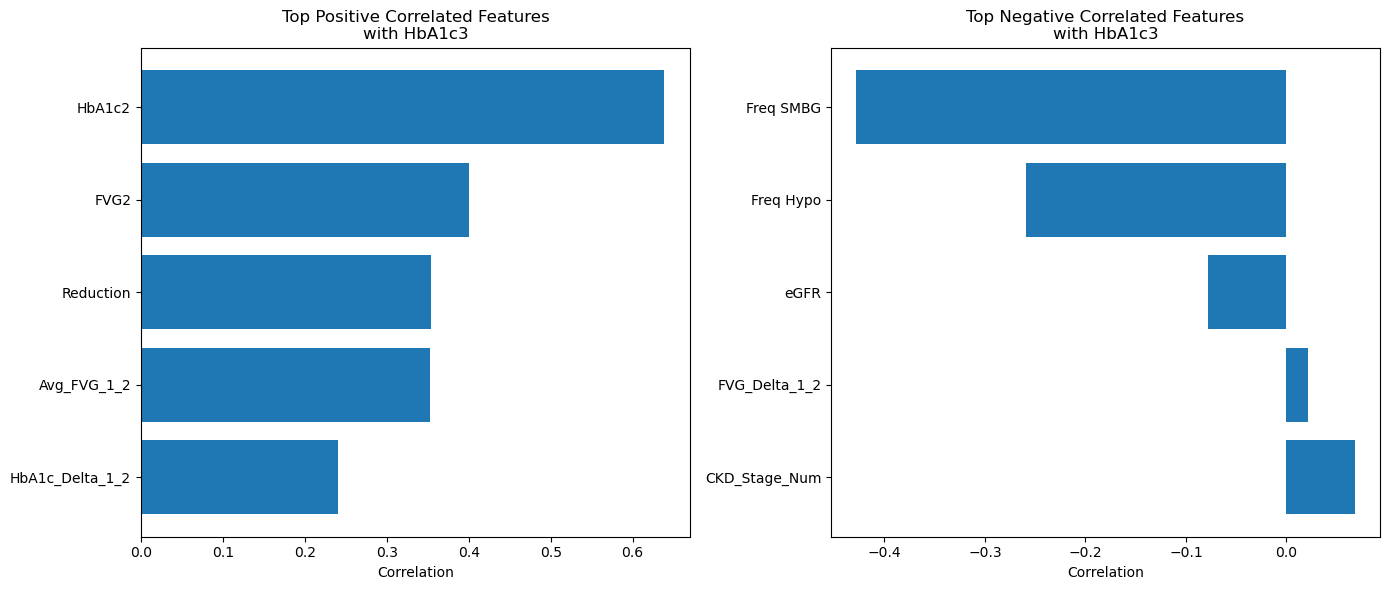

In [93]:
# 1. Compute correlation of all numeric features with target HbA1c3
numeric_df = final_df.select_dtypes(include=['number'])

corr_with_target = numeric_df.corr()["HbA1c3"].drop(labels=["HbA1c3"])
corr_with_target = corr_with_target.dropna()

# 2. Get top positive and top negative correlations
top_n = 5  # change this if you want more/less

top_positive = corr_with_target.sort_values(ascending=False).head(top_n)
top_negative = corr_with_target.sort_values(ascending=True).head(top_n)

print("Top positive correlations with HbA1c3:")
print(top_positive, "\n")
print("Top negative correlations with HbA1c3:")
print(top_negative)

# 3. Plot horizontal bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Left: Top positive correlations ---
axes[0].barh(top_positive.index, top_positive.values)
axes[0].set_title("Top Positive Correlated Features\nwith HbA1c3")
axes[0].set_xlabel("Correlation")
axes[0].invert_yaxis()  # highest at top

# --- Right: Top negative correlations ---
axes[1].barh(top_negative.index, top_negative.values)
axes[1].set_title("Top Negative Correlated Features\nwith HbA1c3")
axes[1].set_xlabel("Correlation")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()
